# Democracy Index Clustering Analysis

**Objective:** Identify political patterns using different clustering methods



**Dataset:** Democracy Index scores across 167 countries, measuring 5 key democratic indicators



**Methods:** K-Means Clustering and Hierarchical Clustering   

In [2]:
# ================== LOADING THE DATA ==================

# data manipulation
import pandas as pd      
import numpy as np

# machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

countries=pd.read_csv('democracy_index.csv') 


In [3]:
# ================== PREPROCESSING AND FEATURE SCALING ==================

# create a df with relevant columns only
filtered_countries=countries[[
    'electoral_processand_pluralism','functioning_of_government', 
    'political_participation','political_culture','civil_liberties'
    ]]


# check data to see if scaling is necessary
print("Feature Statistics:")
print(filtered_countries.describe().round(2))
print("\nVariance by Feature:")
print(filtered_countries.var().round(2))

#the range in variance (12.53 to 2.72) signifies that scaling is necessary
# K-means is a distance based algorithm and is prone to bias towards high variance features


#scaling the features so that the mean is close to 0 and the variance is close to 1
scaler=StandardScaler()
scaled_filtered_countries=scaler.fit_transform(filtered_countries)

Feature Statistics:
       electoral_processand_pluralism  functioning_of_government  \
count                          167.00                     167.00   
mean                             5.90                       4.88   
std                              3.54                       2.52   
min                              0.00                       0.00   
25%                              3.00                       2.86   
50%                              6.58                       5.00   
75%                              9.17                       6.79   
max                             10.00                       9.64   

       political_participation  political_culture  civil_liberties  
count                   167.00             167.00           167.00  
mean                      5.25               5.59             5.77  
std                       1.88               1.65             2.68  
min                       1.11               1.25             0.00  
25%                   

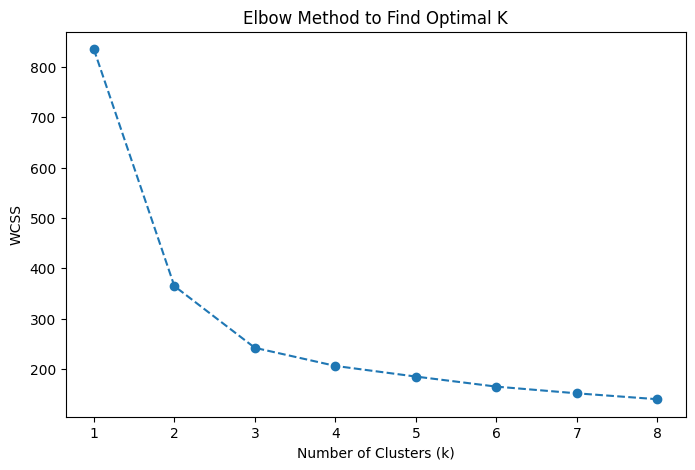

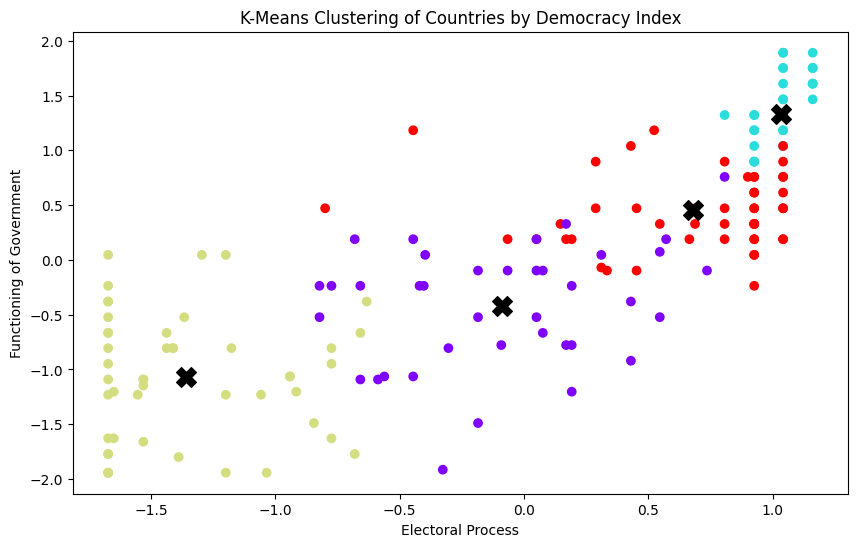

In [4]:
# ================== CLUSTERING ANALYSIS ================== 

#Using Elbow Method to Determine the Optimal Number of Cluster

wcss=[] #within cluster sum of squares
k_values=range(1,9)

for k in k_values:  
    kmeans=KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(scaled_filtered_countries)  
    wcss.append(kmeans.inertia_)  
    
    
##plotting the figure to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()


# Applying K Means Clustering With 4 Clusters (pre-determined knowledge)
kmeans=KMeans(n_clusters=4, random_state=42,n_init=10)
clusters=kmeans.fit_predict(scaled_filtered_countries)

#plotting the clusters
plt.figure(figsize=(10,6))
plt.scatter(scaled_filtered_countries[:,0],scaled_filtered_countries[:,1],c=clusters,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',marker='X')
plt.xlabel('Electoral Process')
plt.ylabel('Functioning of Government')
plt.title('K-Means Clustering of Countries by Democracy Index')
plt.show()

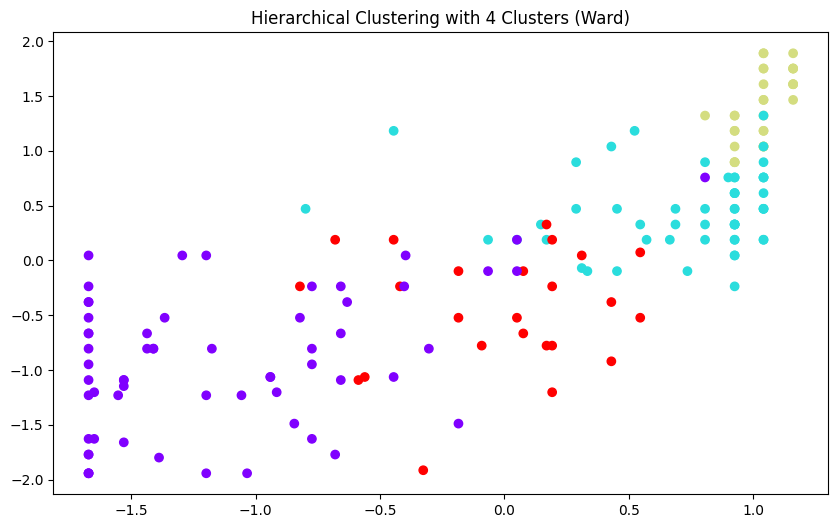

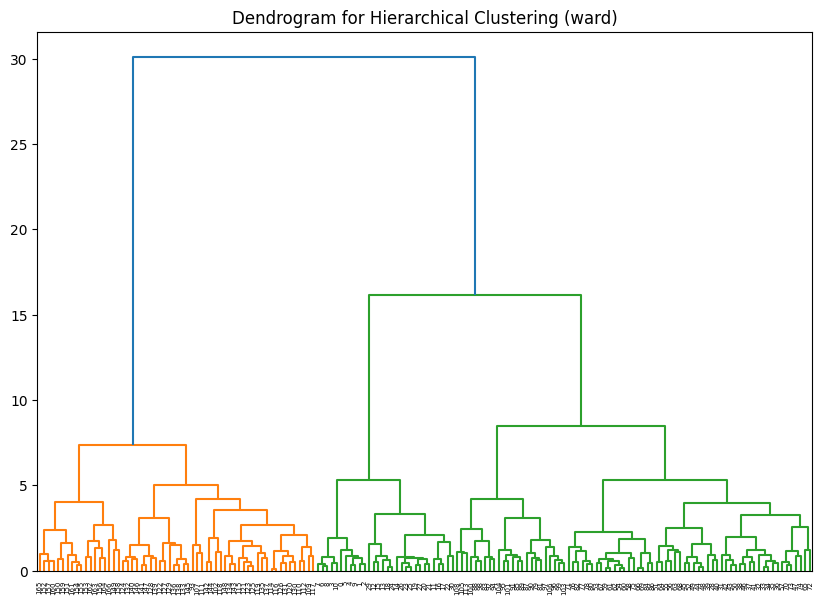

In [5]:
# ================== Hierarchical Clustering Comparison ==================

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
##the first hierarchical clustering using the 'ward' linkage

agg_clustering = AgglomerativeClustering(n_clusters=4,linkage='ward') 
agg_clusters=agg_clustering.fit_predict(scaled_filtered_countries)

#Plotting the Scatter Plot 
plt.figure(figsize=(10,6))
plt.scatter(scaled_filtered_countries[:,0],scaled_filtered_countries[:,1],c=agg_clusters,cmap='rainbow')
plt.title("Hierarchical Clustering with 4 Clusters (Ward)")
plt.show()

# Plotting the Dendrogram
linked=linkage(scaled_filtered_countries, 'ward')

plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top')
plt.title('Dendrogram for Hierarchical Clustering (ward)')
plt.show()

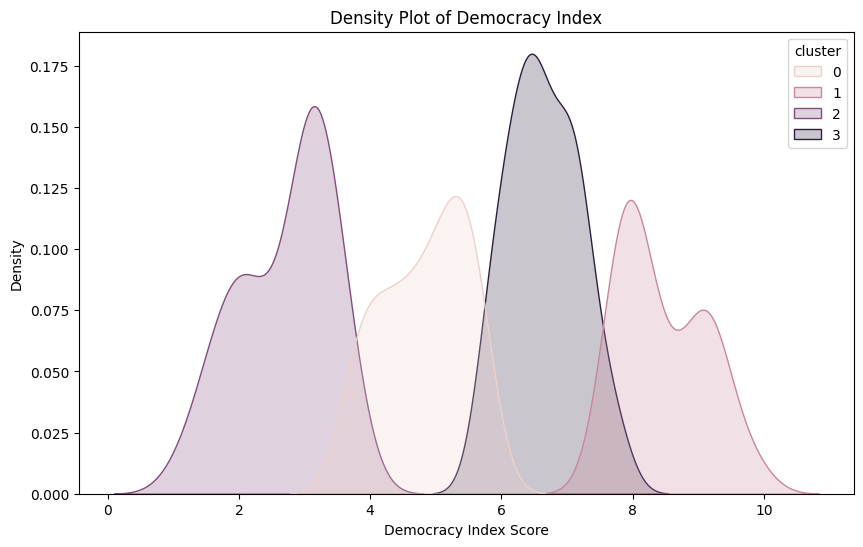


Cluster 0 - Sample Countries.
      country  democracy_index
81      Benin             5.74
83    Ukraine             5.69
84   Honduras             5.63
85     Zambia             5.61
86  Guatemala             5.60

Cluster 1 - Sample Countries.
       country  democracy_index
0       Norway             9.87
1      Iceland             9.58
2       Sweden             9.39
3  New Zealand             9.26
4      Denmark             9.22

Cluster 2 - Sample Countries.
       country  democracy_index
117    Myanmar             3.83
121  Nicaragua             3.63
122     Angola             3.62
123      Gabon             3.61
124   Cambodia             3.59

Cluster 3 - Sample Countries.
                       country  democracy_index
28                      France             7.80
31  Republic of China (Taiwan)             7.73
35                    Slovenia             7.50
36                   Lithuania             7.50
37                      Latvia             7.38


In [6]:
# ================== CLUSTER ANALYSIS ==================     

# Adding Cluster Assignments to the Original df
countries['cluster']=clusters 

#Displaying the Democracy Index Dist. by Cluster
plt.figure(figsize=(10,6))
sns.kdeplot(data=countries,x='democracy_index',hue='cluster',fill=True)
plt.title('Density Plot of Democracy Index')
plt.xlabel('Democracy Index Score')
plt.ylabel('Density')
plt.show()

# Top 5 Countries in Each Cluster
for i in range(4):
    print(f"\nCluster {i} - Sample Countries.")
    print(countries[countries['cluster']==i][['country', 'democracy_index']].head())

In [7]:
################# METRICS #################
# Silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_filtered_countries, clusters)
print(f"Silhouette Score: {score:.2%}")

# Cluster distribution
cluster_counts = pd.Series(clusters).value_counts()
print(f"Cluster sizes: {cluster_counts.to_dict()}")

Silhouette Score: 29.66%
Cluster sizes: {3: 49, 2: 47, 0: 38, 1: 33}


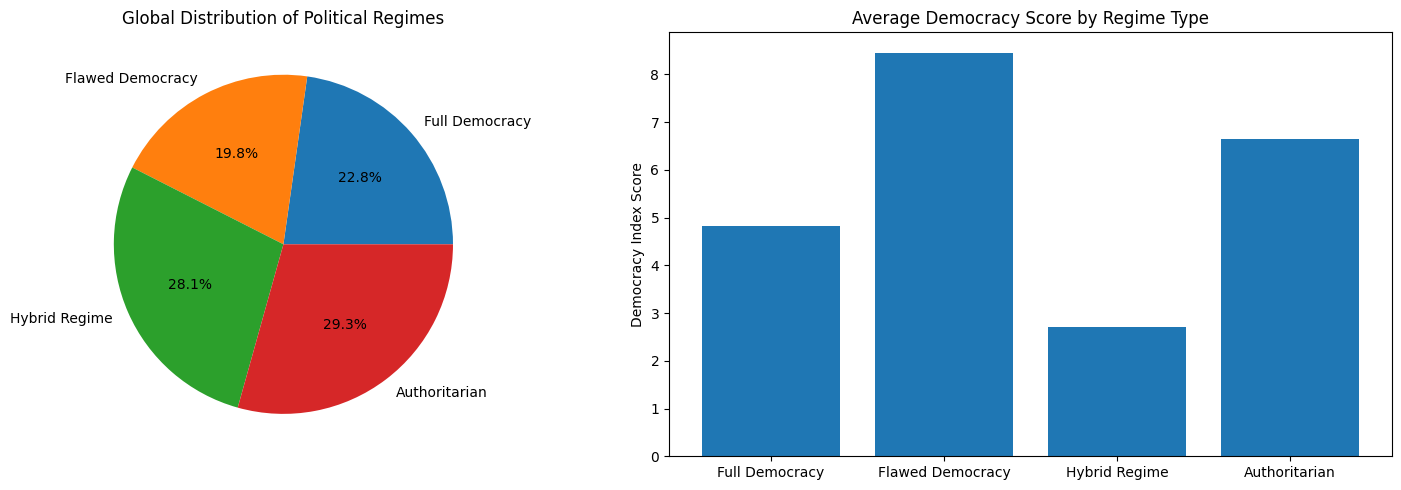

In [8]:
# Cluster interpretation
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Cluster sizes
cluster_labels = ['Full Democracy', 'Flawed Democracy', 'Hybrid Regime', 'Authoritarian']
sizes = [38, 33, 47, 49]
ax[0].pie(sizes, labels=cluster_labels, autopct='%1.1f%%')
ax[0].set_title('Global Distribution of Political Regimes')

# Average scores by cluster
cluster_means = countries.groupby('cluster')['democracy_index'].mean()
ax[1].bar(cluster_labels, cluster_means)
ax[1].set_title('Average Democracy Score by Regime Type')
ax[1].set_ylabel('Democracy Index Score')

plt.tight_layout()
plt.show()